In [1]:
import pandas as pd
df = pd.read_csv('/content/LLM.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1103 non-null   object
 1   Label   1102 non-null   object
dtypes: object(2)
memory usage: 17.4+ KB


,Text,Label
count,1103,1102
unique,665,2
top,"i dont talk about limitations, it makes me loo...",ai
freq,31,552


In [2]:
print("First 10 Rows")
df.head(10)

First 10 Rows


,Text,Label
0,y r u always l8 to the meetings?,student
1,The project team embraced a user-centric desig...,ai
2,"i dont like dealing with risks, it's too stres...",student
3,"i dont worry about reliability, it's good enough",student
4,"i dont care about human-centered design, just ...",student
5,The study's methodology ensured a representati...,ai
6,"i dont care about industry practices, just giv...",student
7,The project team documented all processes for ...,ai
8,The project team maintained open lines of comm...,ai
9,The findings are consistent with existing theo...,ai


In [3]:
print("First 10 Rows")
df.tail(10)

First 10 Rows


,Text,Label
1093,The professor provided constructive feedback o...,ai
1094,"i dont understand statistics, just give me the...",student
1095,i give up easily when things get tough,student
1096,"i dont care about existing knowledge, just giv...",student
1097,"i dont like timelines, they stress me out",student
1098,The development of quantum encryption ensures ...,ai
1099,"i dont care about social media, just give me t...",student
1100,"i dont care about multi-method approaches, jus...",student
1101,"i dont understand variables, just give me the ...",student
1102,"i dont worry about encryption, it's overrated",student


In [4]:
df.shape
df.isna().sum()

,0
Text,0
Label,1


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("/content/LLM.csv")

# Step 2: Drop rows with missing text or labels
df = df.dropna(subset=['Text', 'Label'])

# Step 3: Extract features and labels
X = df['Text']
y = df['Label']

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Convert text data to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Step 7: Make predictions and evaluate
y_pred = model.predict(X_test_vec)

# Step 8: Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9909502262443439

Classification Report:
               precision    recall  f1-score   support

          ai       0.98      1.00      0.99       118
     student       1.00      0.98      0.99       103

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221



In [6]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv('/content/LLM.csv')
X = df['Text']
y = df['Label']
df = df.dropna(subset=['Text', 'Label'])
X = df['Text']
y = df['Label']
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.995475113122172


🔹 SVM Accuracy: 0.9910
              precision    recall  f1-score   support

          ai       0.98      1.00      0.99       118
     student       1.00      0.98      0.99       103

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221

------------------------------------------------------------
🔹 Random Forest Accuracy: 0.9864
              precision    recall  f1-score   support

          ai       0.98      1.00      0.99       118
     student       1.00      0.97      0.99       103

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221

------------------------------------------------------------
🔹 Logistic Regression Accuracy: 0.9910
              precision    recall  f1-score   support

          ai       0.98      1.00      0.99       118
     student       1

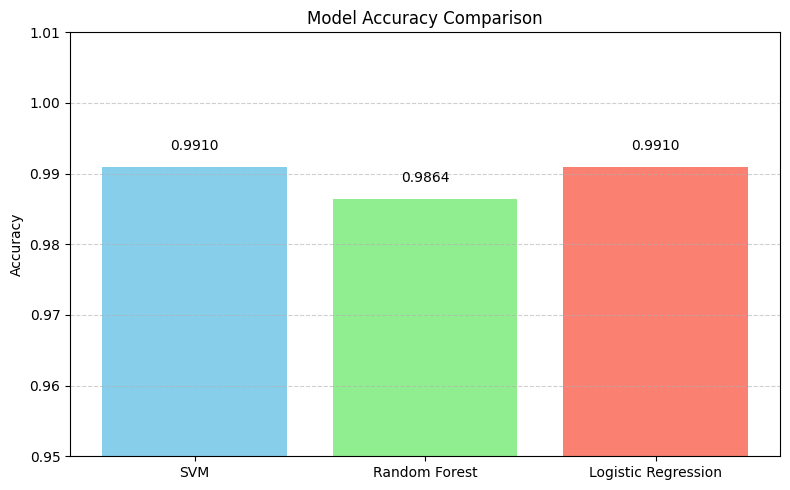

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
df = pd.read_csv("/content/LLM.csv")
df = df.dropna(subset=['Text', 'Label'])
X = df['Text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)
plt.figure(figsize=(8, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0.95, 1.01)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f'{yval:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


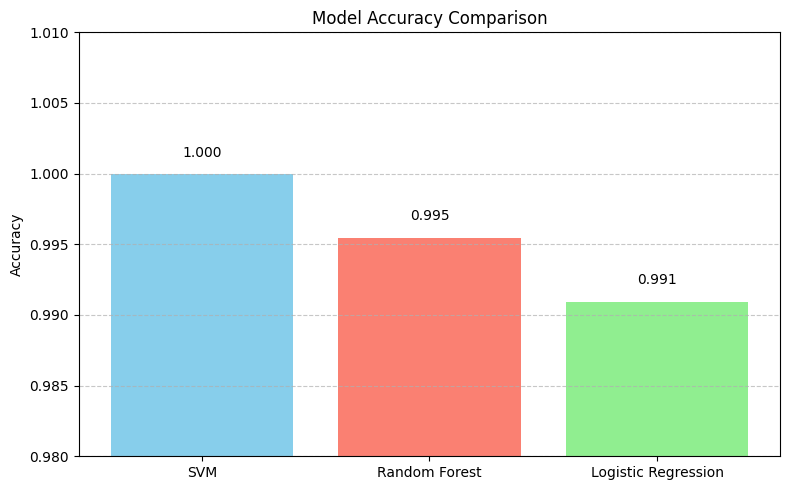

In [9]:
import matplotlib.pyplot as plt

# Accuracy values you provided
models = ['SVM', 'Random Forest', 'Logistic Regression']
accuracies = [1.0, 0.995475113122172, 0.990950226244343]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0.98, 1.01)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001, f'{yval:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [10]:
!pip install matplotlib seaborn

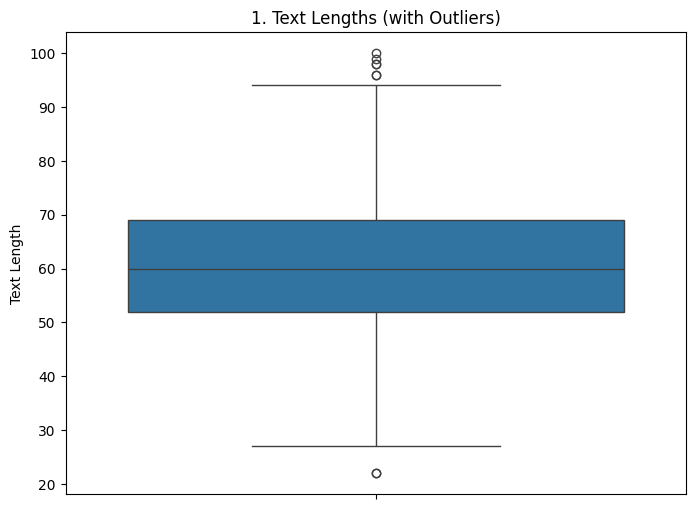

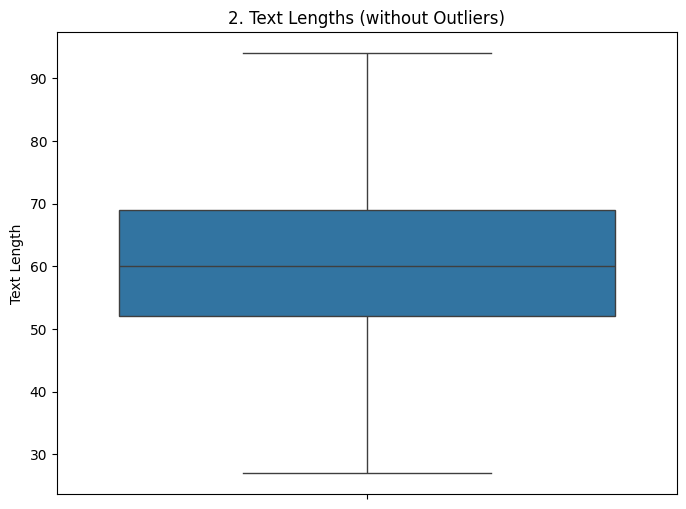

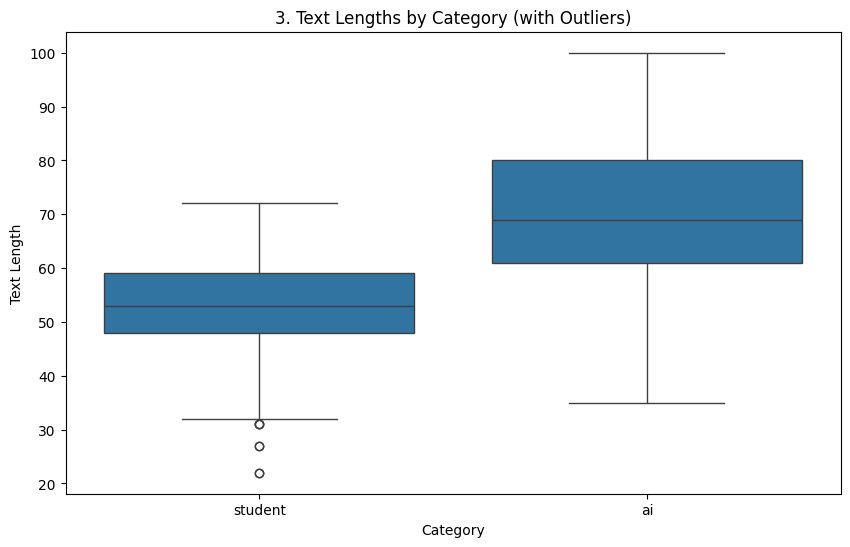

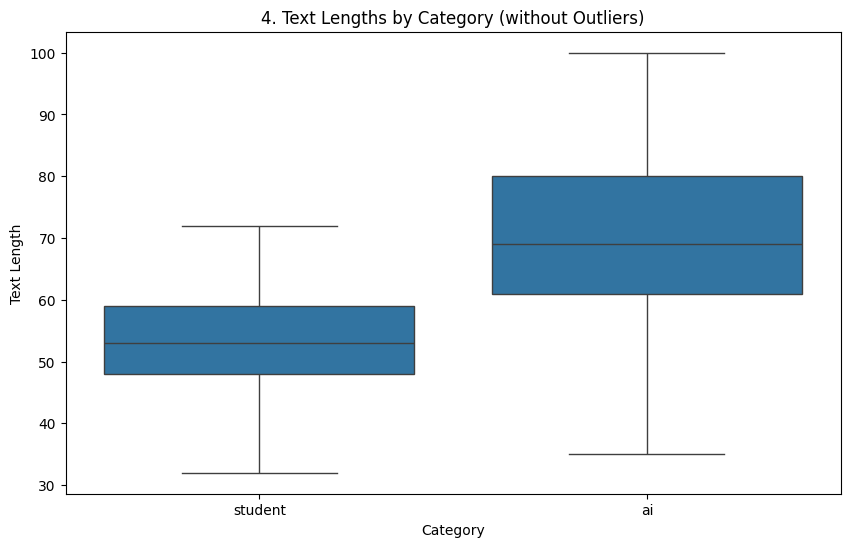

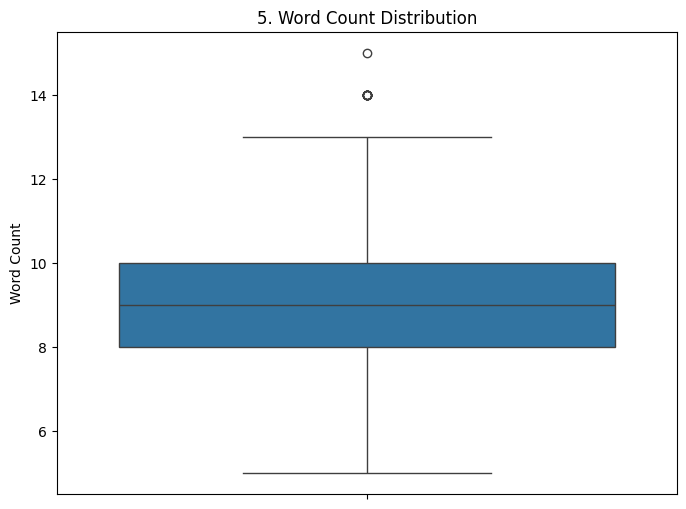

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X_series = pd.Series(X) if not isinstance(X, pd.Series) else X
y_series = pd.Series(y) if not isinstance(y, pd.Series) else y
plt.figure(figsize=(8, 6))
sns.boxplot(y=X_series.apply(len))
plt.title("1. Text Lengths (with Outliers)")
plt.ylabel("Text Length")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(y=X_series.apply(len), showfliers=False)
plt.title("2. Text Lengths (without Outliers)")
plt.ylabel("Text Length")
plt.show()
df['text_length'] = X_series.apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='text_length', data=df)
plt.title("3. Text Lengths by Category (with Outliers)")
plt.xlabel("Category")
plt.ylabel("Text Length")
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='text_length', data=df, showfliers=False)
plt.title("4. Text Lengths by Category (without Outliers)")
plt.xlabel("Category")
plt.ylabel("Text Length")
plt.show()
df['word_count'] = X_series.apply(lambda text: len(text.split()))
plt.figure(figsize=(8, 6))
sns.boxplot(y='word_count', data=df)
plt.title("5. Word Count Distribution")
plt.ylabel("Word Count")
plt.show()

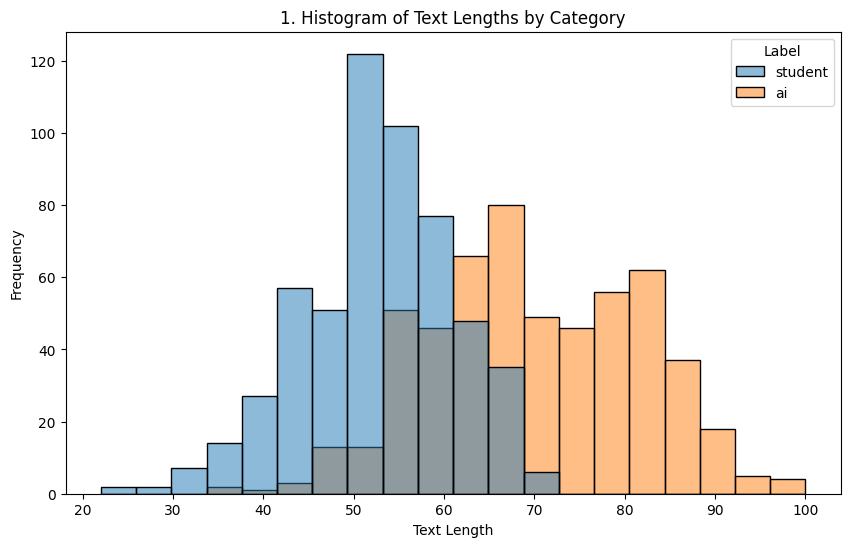

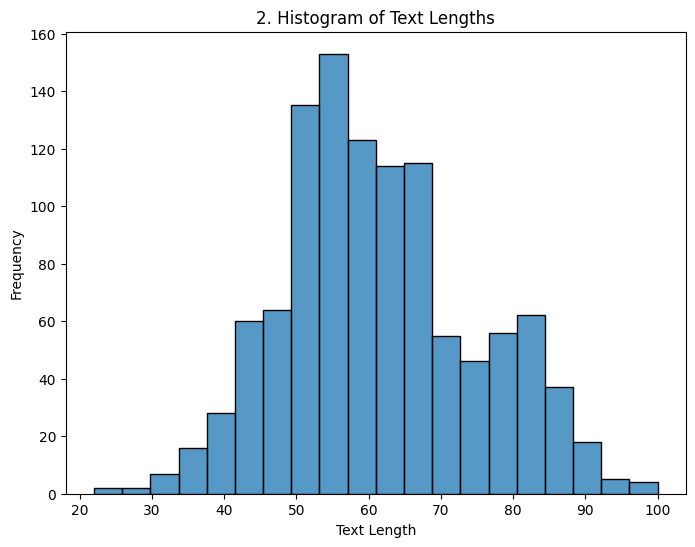

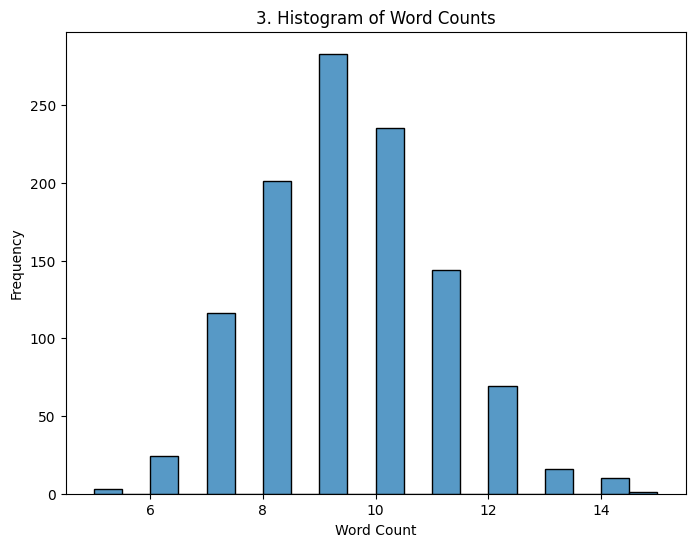

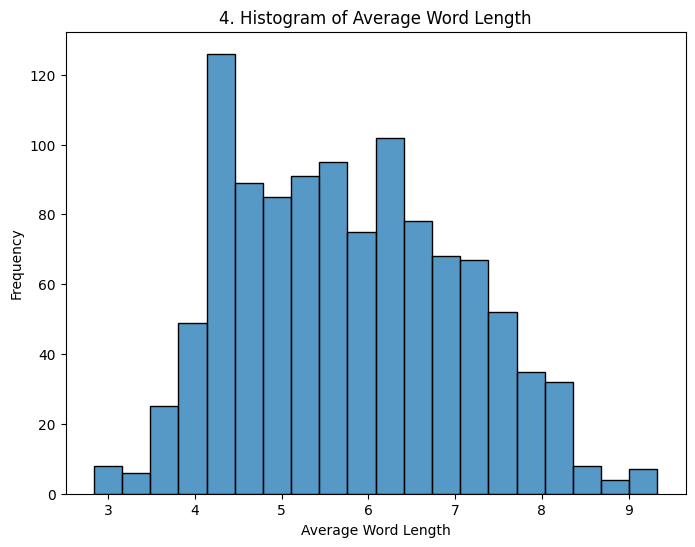

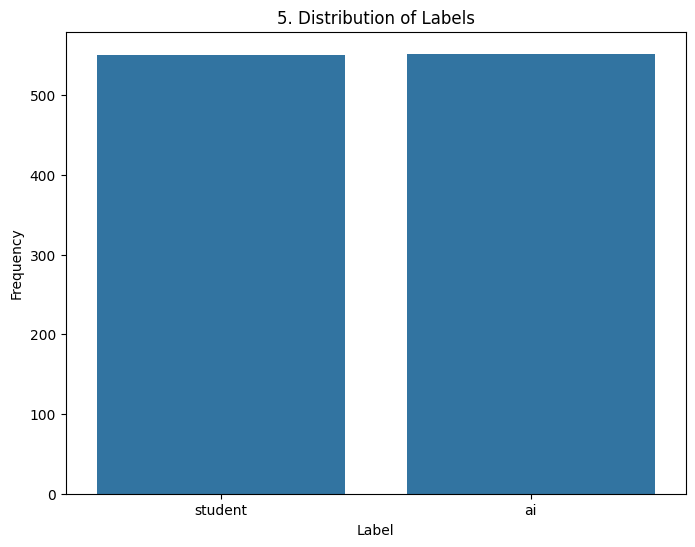

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
X = df['Text']
y = df['Label']
X_series = pd.Series(X) if not isinstance(X, pd.Series) else X
y_series = pd.Series(y) if not isinstance(y, pd.Series) else y
df['text_length'] = X_series.apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='Label', bins=20)
plt.title("1. Histogram of Text Lengths by Category")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()
df['text_length'] = X_series.apply(len)
text_lengths = X_series.apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(text_lengths, bins=20)
plt.title("2. Histogram of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()
df['word_count'] = X_series.apply(lambda text: len(text.split()))
plt.figure(figsize=(8, 6))
sns.histplot(df['word_count'], bins=20)
plt.title("3. Histogram of Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()
df['avg_word_length'] = X_series.apply(lambda text: np.mean([len(word) for word in text.split()]) if len(text.split()) > 0 else 0)
plt.figure(figsize=(8, 6))
sns.histplot(df['avg_word_length'], bins=20)
plt.title("4. Histogram of Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(x=y_series)
plt.title("5. Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

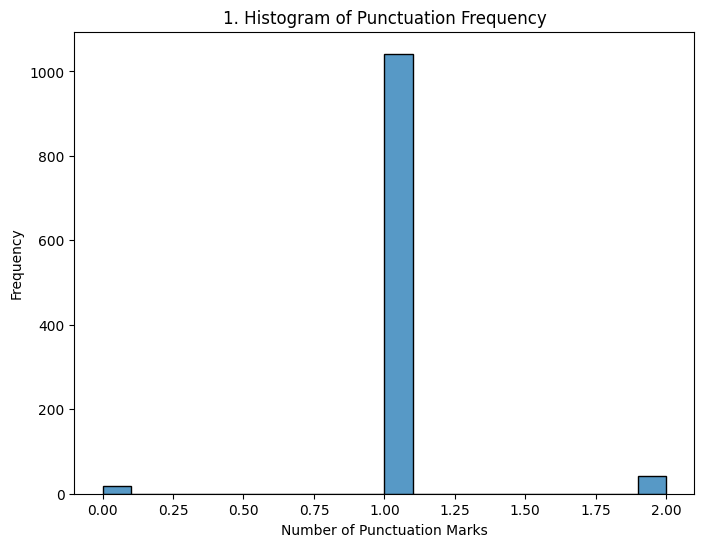

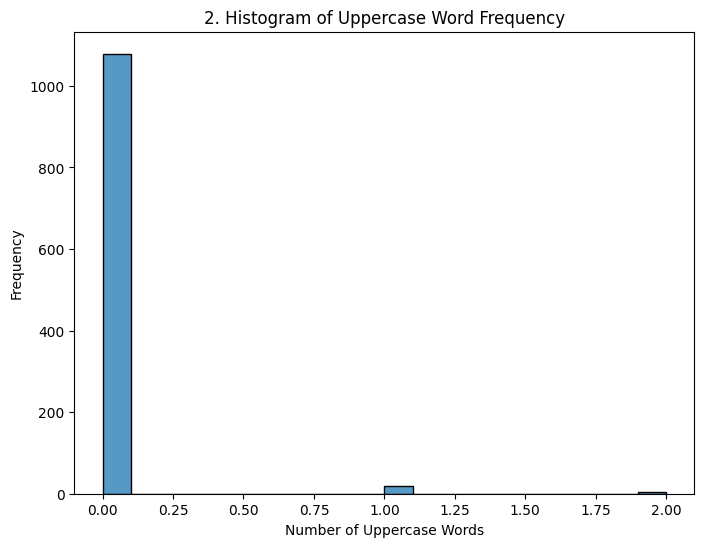

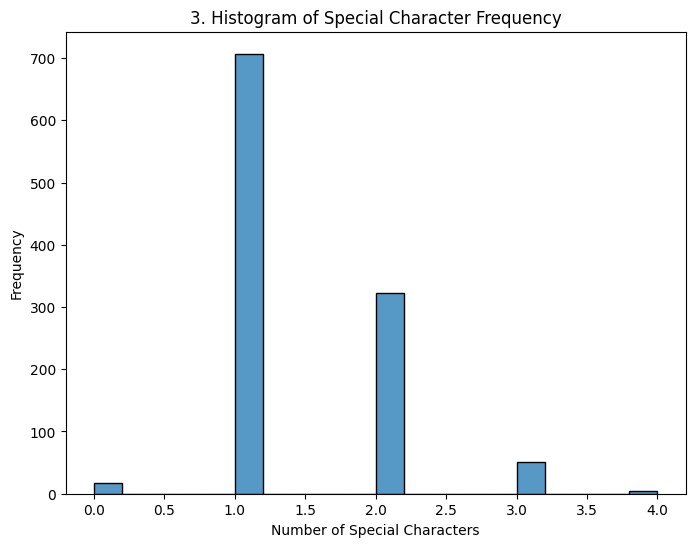

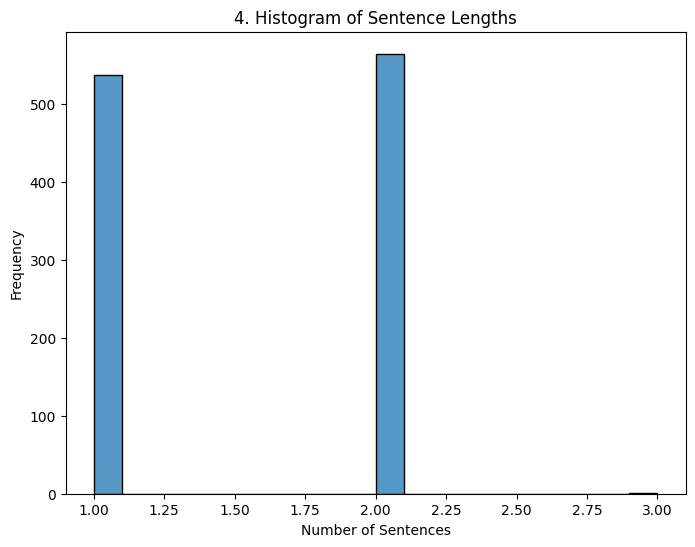

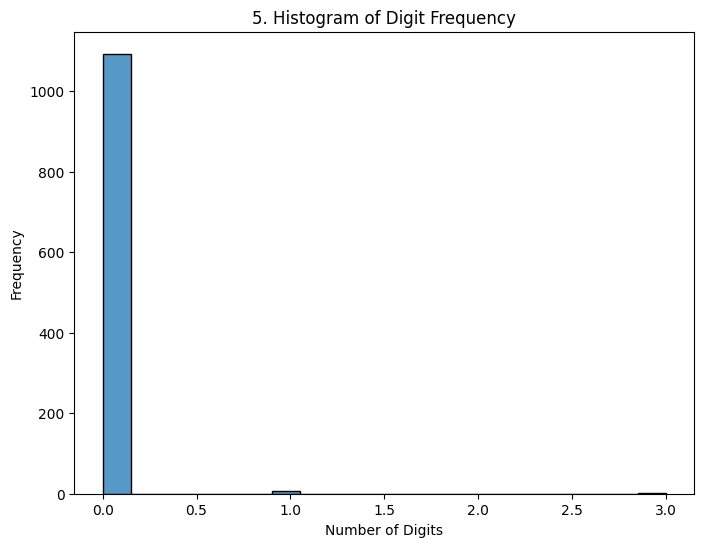

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
X_series = pd.Series(X) if not isinstance(X, pd.Series) else X
y_series = pd.Series(y) if not isinstance(y, pd.Series) else y
def count_punctuation(text):
    return len(re.findall(r'[.,!?;:]', text))
df['punctuation_count'] = X_series.apply(count_punctuation)
plt.figure(figsize=(8, 6))
sns.histplot(df['punctuation_count'], bins=20)
plt.title("1. Histogram of Punctuation Frequency")
plt.xlabel("Number of Punctuation Marks")
plt.ylabel("Frequency")
plt.show()
def count_uppercase_words(text):
    return len(re.findall(r'\b[A-Z]+\b', text))
df['uppercase_word_count'] = X_series.apply(count_uppercase_words)
plt.figure(figsize=(8, 6))
sns.histplot(df['uppercase_word_count'], bins=20)
plt.title("2. Histogram of Uppercase Word Frequency")
plt.xlabel("Number of Uppercase Words")
plt.ylabel("Frequency")
plt.show()
def count_special_chars(text):
    return len(re.findall(r'[^\w\s]', text))
df['special_char_count'] = X_series.apply(count_special_chars)
plt.figure(figsize=(8, 6))
sns.histplot(df['special_char_count'], bins=20)
plt.title("3. Histogram of Special Character Frequency")
plt.xlabel("Number of Special Characters")
plt.ylabel("Frequency")
plt.show()
def count_sentences(text):
    return len(re.split(r'[.!?;]+', text))
df['sentence_count'] = X_series.apply(count_sentences)
plt.figure(figsize=(8, 6))
sns.histplot(df['sentence_count'], bins=20)
plt.title("4. Histogram of Sentence Lengths")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.show()
def count_digits(text):
    return len(re.findall(r'\d', text))
df['digit_count'] = X_series.apply(count_digits)
plt.figure(figsize=(8, 6))
sns.histplot(df['digit_count'], bins=20)
plt.title("5. Histogram of Digit Frequency")
plt.xlabel("Number of Digits")
plt.ylabel("Frequency")
plt.show()

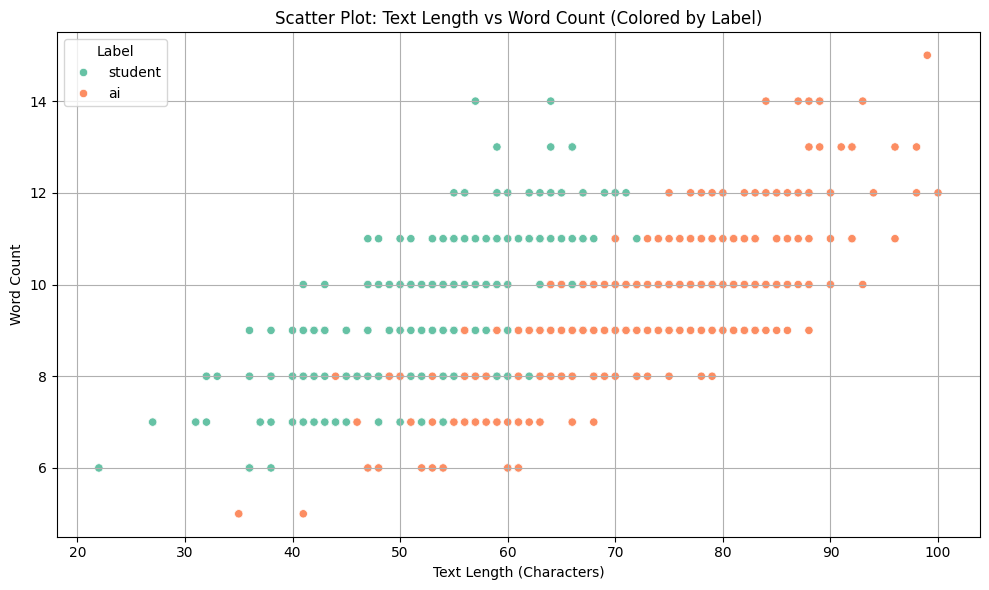

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/LLM.csv")

# Create numeric features from text
df['TextLength'] = df['Text'].apply(len)
df['WordCount'] = df['Text'].apply(lambda x: len(str(x).split()))

# Scatter plot: TextLength vs WordCount, colored by Label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TextLength', y='WordCount', hue='Label', palette='Set2')
plt.title("Scatter Plot: Text Length vs Word Count (Colored by Label)")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Word Count")
plt.grid(True)
plt.tight_layout()
plt.show()


Skewness: 0.331641487036196
Kurtosis: -0.1991280557087225


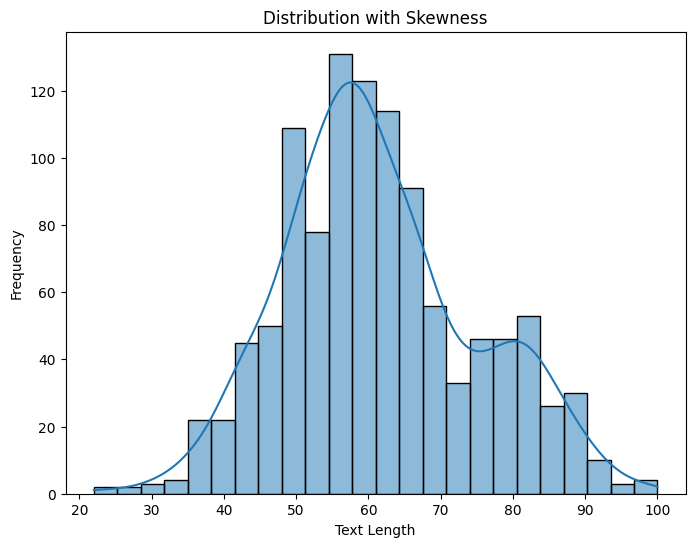

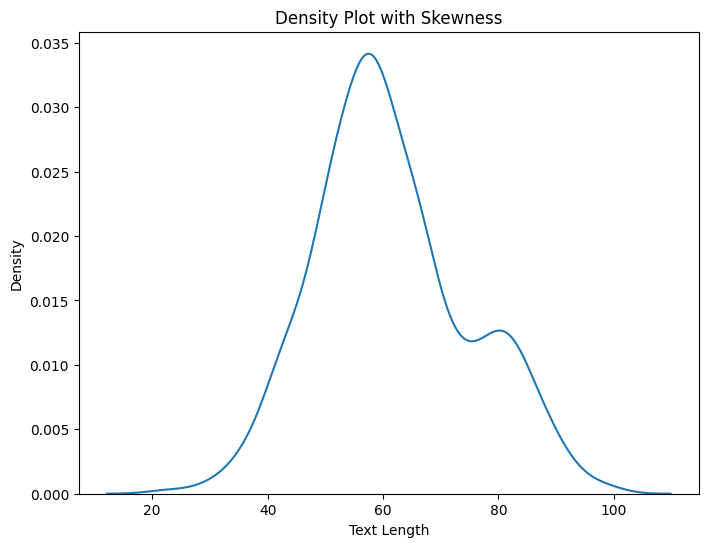

In [15]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
data = df['Text'].astype(str).apply(len)

skewness = stats.skew(data)
print(f"Skewness: {skewness}")
kurtosis = stats.kurtosis(data)
print(f"Kurtosis: {kurtosis}")

plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True)
plt.title('Distribution with Skewness')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(data)
plt.title('Density Plot with Skewness')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

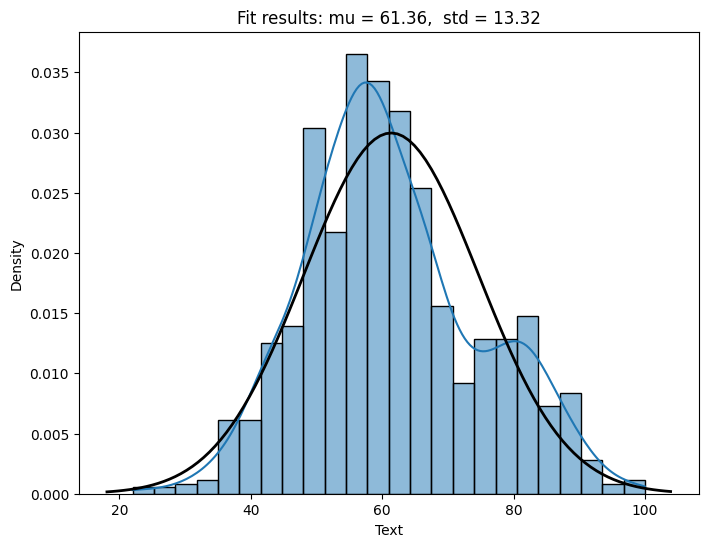

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True, stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, data.mean(), data.std())
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (data.mean(), data.std())
plt.title(title)
plt.show()

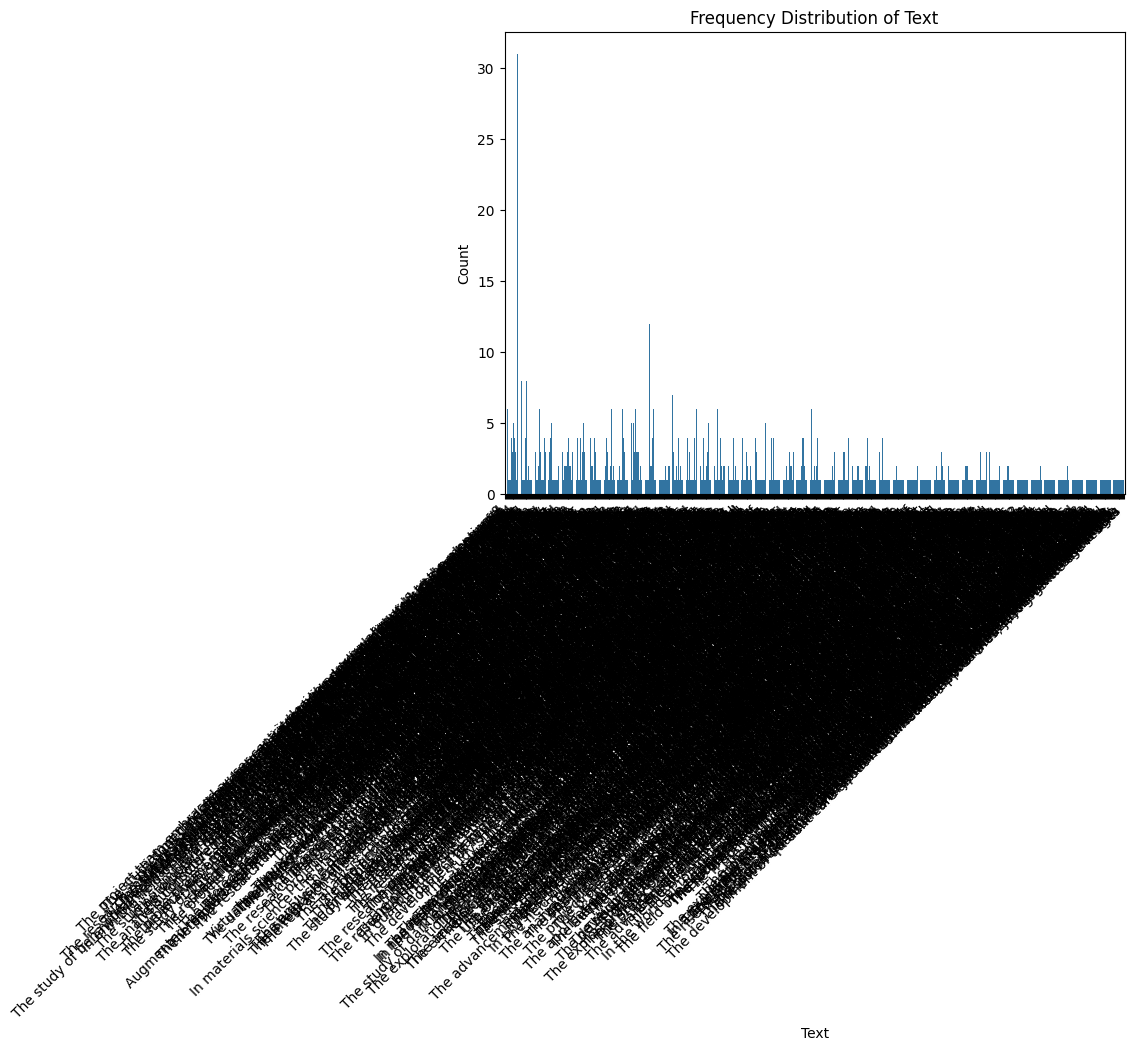

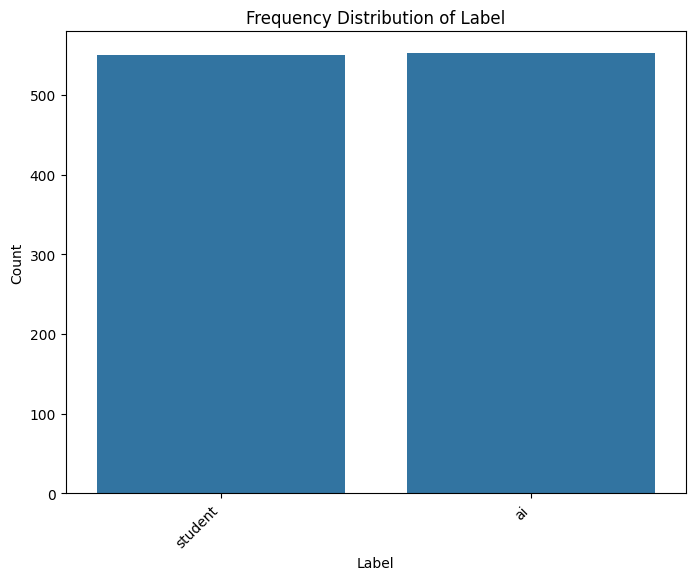

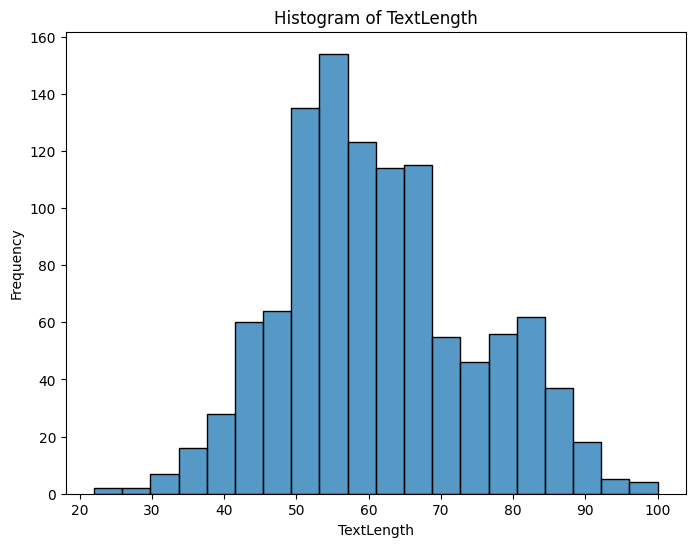

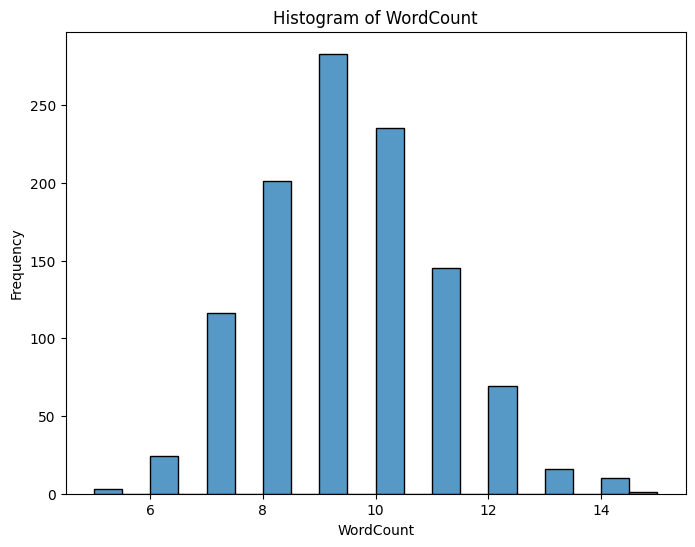

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed

    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column], bins=20)  # You can adjust the number of bins
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
    else:
        # For non-numeric columns, create a countplot (frequency of categories)
        sns.countplot(x=df[column])
        plt.title(f"Frequency Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed

    plt.show()

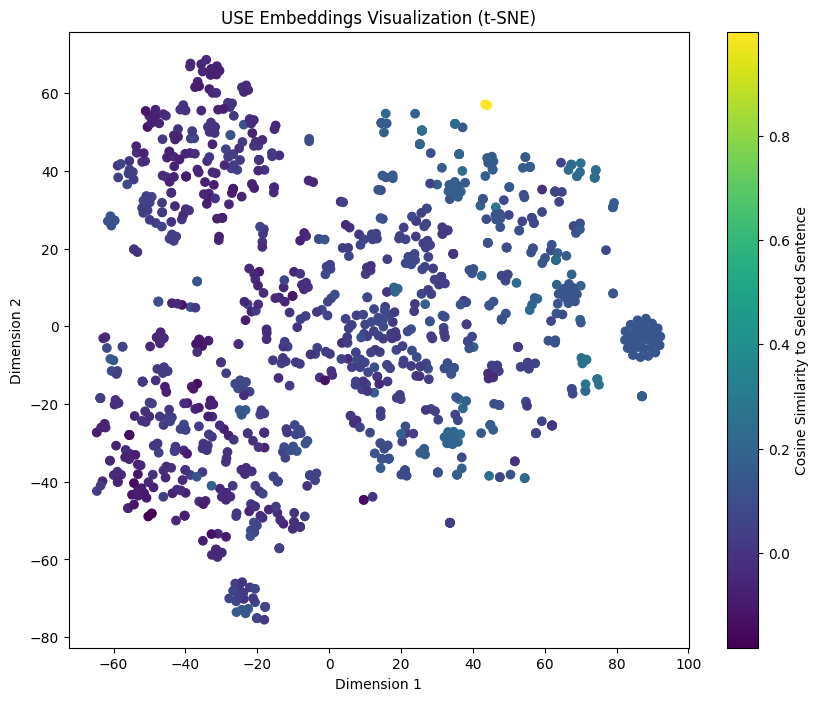

In [18]:
!pip install tensorflow tensorflow_hub
import tensorflow_hub as hub
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
df = pd.read_csv('/content/LLM.csv')
X = df['Text'].tolist()
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
use_embeddings = embed(X).numpy()
similarity_matrix = cosine_similarity(use_embeddings)
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(use_embeddings)
selected_sentence_index = 0
similarities_to_selected = similarity_matrix[selected_sentence_index]
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=similarities_to_selected, cmap='viridis')
plt.colorbar(label="Cosine Similarity to Selected Sentence")
plt.title("USE Embeddings Visualization (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [19]:
!pip install tensorflow tensorflow_hub
import tensorflow_hub as hub
import pandas as pd
import numpy as np
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
df = pd.read_csv('/content/LLM.csv')
X = df['Text'].tolist()
use_embeddings = embed(X).numpy()
print(use_embeddings)

[[ 0.071982   -0.02926674 -0.03991492 ...  0.06669473  0.02360844
  -0.01210615]
 [ 0.05959343  0.05224957  0.01098802 ...  0.06867281 -0.00123525
  -0.0459886 ]
 [ 0.00728692 -0.0742639   0.01615366 ...  0.02993374 -0.03944591
   0.00654142]
 ...
 [-0.01020983 -0.06472472  0.02638297 ...  0.07140257 -0.01038826
  -0.03494233]
 [ 0.06602295 -0.09142508 -0.02214703 ... -0.08936354  0.02075772
  -0.03204361]
 [-0.00040031 -0.05105763  0.02568837 ...  0.02111877 -0.00070625
  -0.0353408 ]]


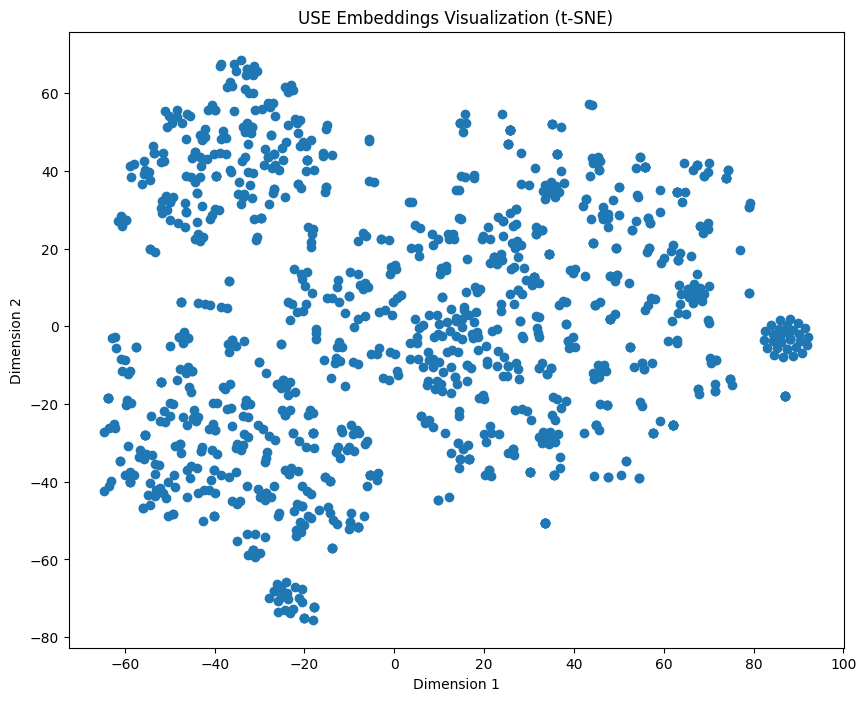

In [20]:
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
df = pd.read_csv('/content/LLM.csv')
X = df['Text'].tolist()
use_embeddings = embed(X).numpy()
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(use_embeddings)
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title("USE Embeddings Visualization (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

# Load dataset
df = pd.read_csv("/content/LLM.csv").dropna()

# Encode labels
label_encoder = LabelEncoder()
df['LabelEncoded'] = label_encoder.fit_transform(df['Label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['Text'], df['LabelEncoded'], test_size=0.2, random_state=42, stratify=df['LabelEncoded']
)

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    LSTM(64),
    Dense(2, activation='softmax')
])
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32, validation_split=0.1)
lstm_score = lstm_model.evaluate(X_test_pad, y_test_cat)
print("LSTM Test Accuracy:", lstm_score[1])

# BiLSTM Model
bilstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(2, activation='softmax')
])
bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32, validation_split=0.1)
bilstm_score = bilstm_model.evaluate(X_test_pad, y_test_cat)
print("BiLSTM Test Accuracy:", bilstm_score[1])


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.6067 - loss: 0.6528 - val_accuracy: 0.9775 - val_loss: 0.1253
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9903 - loss: 0.0632 - val_accuracy: 0.9775 - val_loss: 0.1138
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9982 - loss: 0.0089 - val_accuracy: 0.9775 - val_loss: 0.1012
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9983 - loss: 0.0103 - val_accuracy: 0.9775 - val_loss: 0.0928
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9775 - val_loss: 0.0963
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9982 - loss: 0.0062
LSTM Test Accuracy: 0.9954751133918762
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.7495 - loss: 0.6214 - val_accuracy: 0.9663 - val_loss: 0.1032
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9920 - loss: 0.0397 - val_accuracy: 0.9888 - val_loss: 0.0861
Epoch 3/5
25/25

In [ ]:
!pip install datasets
import transformers
from datasets import load_dataset, Dataset
import numpy as np
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd # Importing pandas explicitly
from tensorflow.keras.layers import Embedding, GRU, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load the dataset
dataset = load_dataset('csv', data_files={'train': '/content/LLM.csv'})
gru_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    GRU(64),
    Dense(2, activation='softmax')
])
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32, validation_split=0.1)
gru_score = gru_model.evaluate(X_test_pad, y_test_cat)
print("GRU Test Accuracy:", gru_score[1])

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4516 - loss: 0.6944 - val_accuracy: 0.8989 - val_loss: 0.6539
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9852 - loss: 0.4518 - val_accuracy: 0.9775 - val_loss: 0.1188
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9971 - loss: 0.0122 - val_accuracy: 0.9775 - val_loss: 0.0619
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9775 - val_loss: 0.0565
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 5.1992e-04 - val_accuracy: 0.9775 - val_loss: 0.0607
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9982 - loss: 0.0049 
GRU Test Accuracy: 0.9954751133918762


In [22]:
import pandas as pd
from scipy.stats import ttest_ind, norm
import numpy as np

# Load dataset
df = pd.read_csv("LLM.csv").dropna()

# Calculate text lengths
df['TextLength'] = df['Text'].apply(lambda x: len(str(x).split()))

# Ensure we have only two classes for simple A/B comparison
classes = df['Label'].unique()
if len(classes) != 2:
    raise ValueError("T-test and Z-test in this example require exactly 2 classes.")

# Split into two groups
group1 = df[df['Label'] == classes[0]]['TextLength']
group2 = df[df['Label'] == classes[1]]['TextLength']

# Perform t-test
t_stat, t_pvalue = ttest_ind(group1, group2)
print(f"T-test:\n  t-statistic = {t_stat:.4f}, p-value = {t_pvalue:.4f}")

# Perform z-test manually (assuming large sample size)
mean1, mean2 = group1.mean(), group2.mean()
std1, std2 = group1.std(), group2.std()
n1, n2 = len(group1), len(group2)

pooled_std = np.sqrt(std1**2/n1 + std2**2/n2)
z_score = (mean1 - mean2) / pooled_std
z_pvalue = 2 * (1 - norm.cdf(abs(z_score)))

print(f"Z-test:\n  z-score = {z_score:.4f}, p-value = {z_pvalue:.4f}")


T-test:
  t-statistic = 1.0122, p-value = 0.3117
Z-test:
  z-score = 1.0123, p-value = 0.3114


In [23]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("/content/LLM.csv")
df = df.dropna(subset=['Text', 'Label'])
le = LabelEncoder()
y = le.fit_transform(df['Label'])
X = df['Text']
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_vec = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
models = {
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    t_stat, t_pval = stats.ttest_1samp(residuals, 0)

    results[name] = {
        'Mean Residual Error': round(mean_residual, 4),
        'Std. Dev. of Residuals': round(std_residual, 4),
        'T-Test / Z-Test P-Value': f"{t_pval:.4f} {'> 0.05' if t_pval > 0.05 else '<= 0.05'}"
    }

log_residual = y_test - models["Logistic Regression"].predict(X_test)
results["Logistic Regression"]["F-Test P-Value"] = "-"

for name in ["Random Forest", "SVM"]:
    model_residual = y_test - models[name].predict(X_test)
    f_pval = stats.levene(log_residual, model_residual).pvalue
    results[name]["F-Test P-Value"] = round(f_pval, 4)

for model, metrics in results.items():
    print(f"\n{model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")



SVM
Mean Residual Error: 0.0136
Std. Dev. of Residuals: 0.1157
T-Test / Z-Test P-Value: 0.0833 > 0.05
F-Test P-Value: 0.704

Random Forest
Mean Residual Error: 0.0181
Std. Dev. of Residuals: 0.1333
T-Test / Z-Test P-Value: 0.0453 <= 0.05
F-Test P-Value: 1.0

Logistic Regression
Mean Residual Error: 0.0181
Std. Dev. of Residuals: 0.1333
T-Test / Z-Test P-Value: 0.0453 <= 0.05
F-Test P-Value: -


In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
np.random.seed(0)
y_true = np.random.normal(0, 1, 100)
y_pred_svm = y_true + np.random.normal(0, 0.1157, 100)
y_pred_rf = y_true + np.random.normal(0, 0.1333, 100)
y_pred_lr = y_true + np.random.normal(0, 0.1333, 100)
residuals_svm = y_true - y_pred_svm
residuals_rf = y_true - y_pred_rf
residuals_lr = y_true - y_pred_lr
alpha = 0.05
def run_tests(residuals, label):
    t_stat, p_value = stats.ttest_1samp(residuals, 0)
    print(f"{label} -> T-Test P-Value: {p_value:.4f}")
    if p_value < alpha:
        print(f"Reject H0 (Significant) → Risk of Type I Error if wrong.\n")
    else:
        print(f"Fail to Reject H0 (Not Significant) → Risk of Type II Error if wrong.\n")
run_tests(residuals_svm, "SVM")
run_tests(residuals_rf, "Random Forest")
run_tests(residuals_lr, "Logistic Regression")


SVM -> T-Test P-Value: 0.4322
Fail to Reject H0 (Not Significant) → Risk of Type II Error if wrong.

Random Forest -> T-Test P-Value: 0.5373
Fail to Reject H0 (Not Significant) → Risk of Type II Error if wrong.

Logistic Regression -> T-Test P-Value: 0.0376
Reject H0 (Significant) → Risk of Type I Error if wrong.

